#Mobile Price Clasification

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

Dataset variable description as follows:

ID: ID

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

##Import library and read file from google drive

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1nIfjLqHfdnkQcGkjK5z6trzgtmVOFAp0/view?usp=sharing'
 
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train.csv') 
 
df = pd.read_csv('train.csv')
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

##Making EDA

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# See the shape of the dataset
df.shape

(2000, 21)

In [ ]:
# checking columns in df
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Check the information from df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# See the description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [ ]:
# Find the number of unique Values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df['int_memory'].unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
# Check missing value
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
categorical_features=list()
numeric_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      categorical_features.append(column_name)
    else:
      numeric_features.append(column_name)

In [ ]:
categorical_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
numeric_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

##Visualization

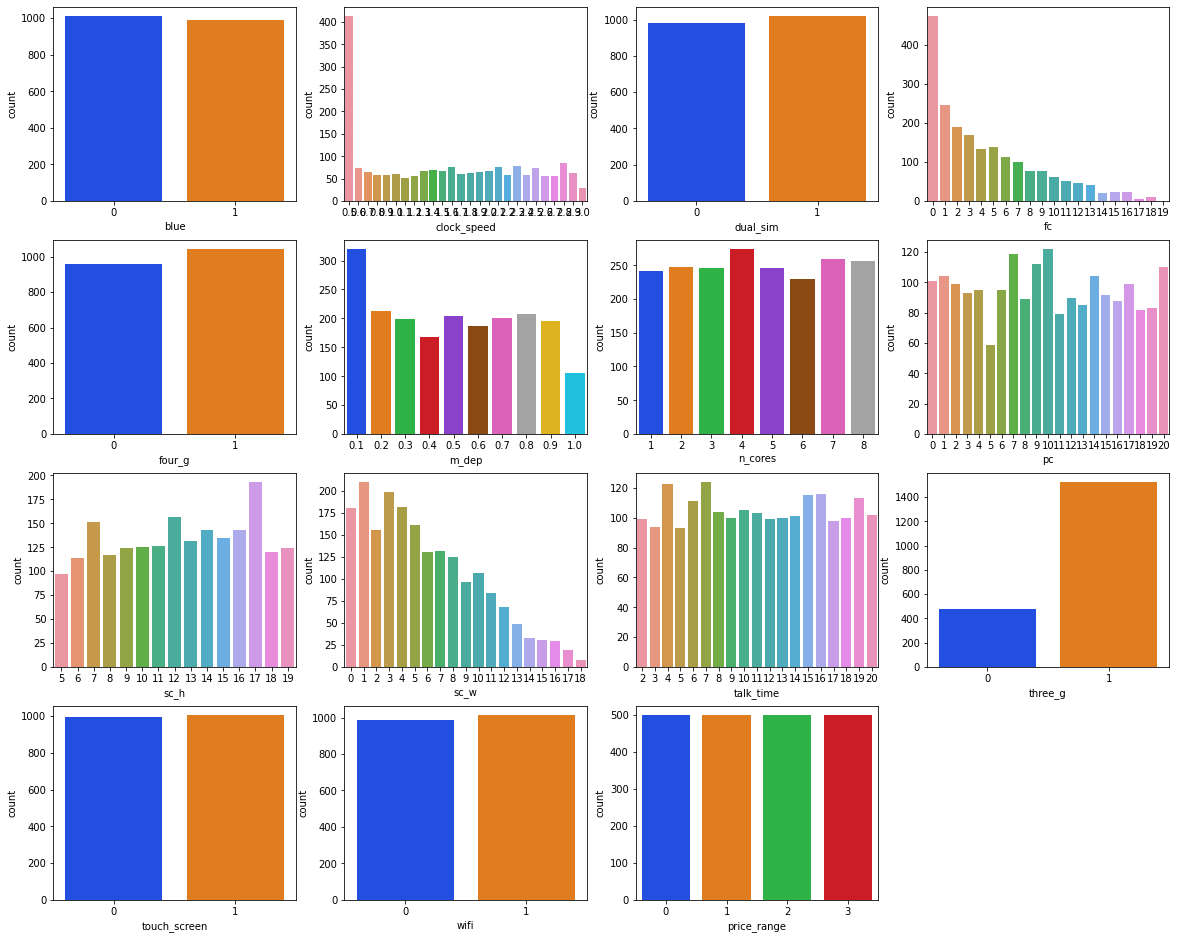

In [ ]:
i = 1
plt.figure(figsize = (20,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.set_palette("bright")
    sns.countplot(x = feature , data = df)
    i +=1

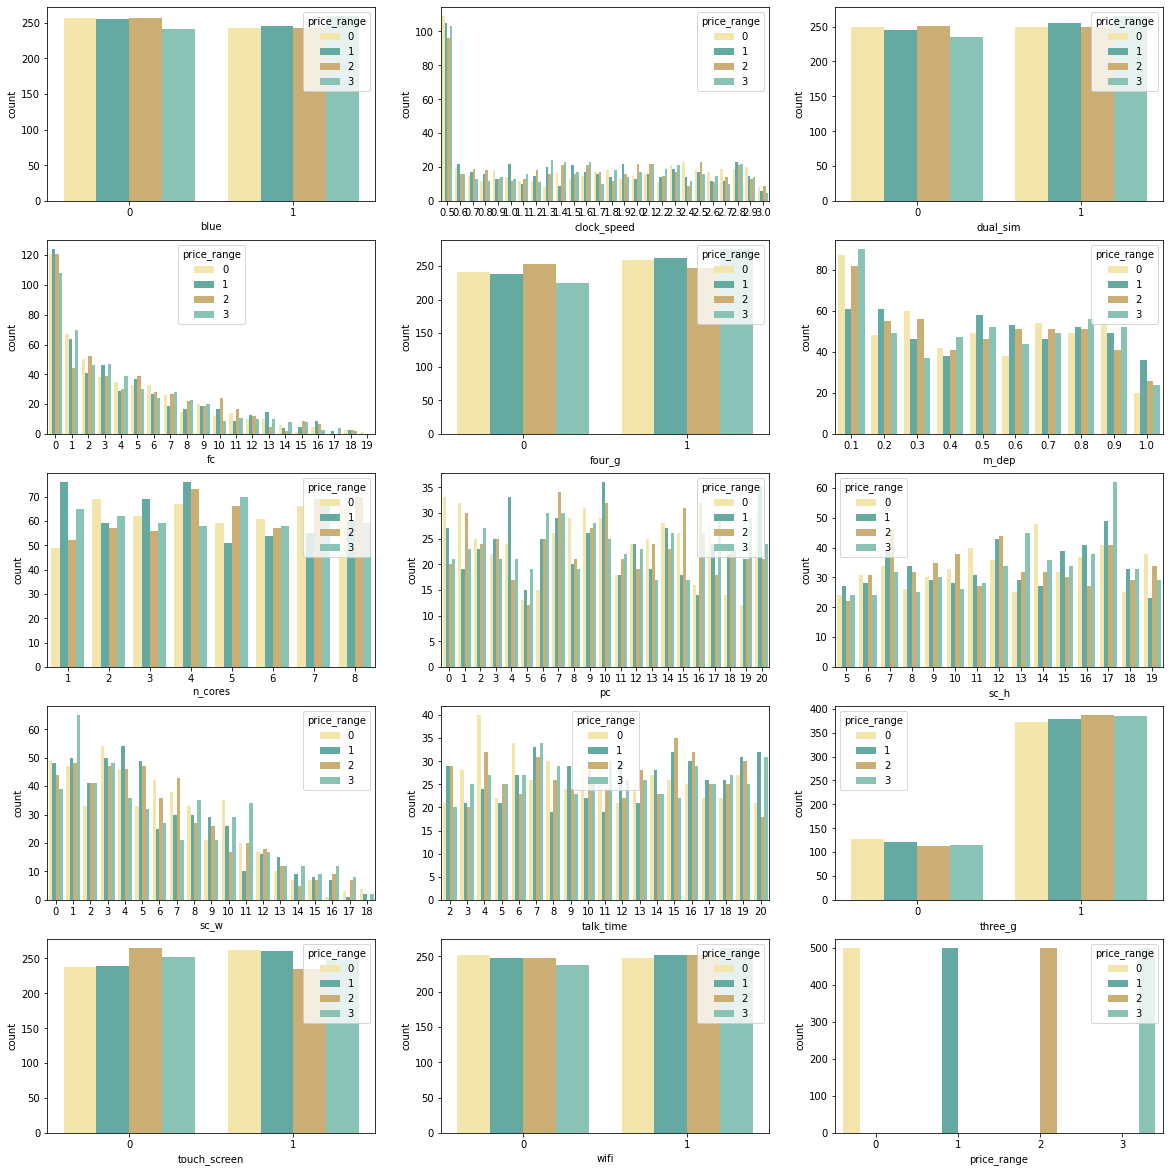

In [ ]:
# Make a analysis with categorical features
i = 1
plt.figure(figsize = (20,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.set_palette("deep")
    sns.countplot(x = feature , data = df,hue='price_range', palette=["#ffeda0", "#5ab4ac", "#d8b365", "#7fcdbb"])
    i +=1

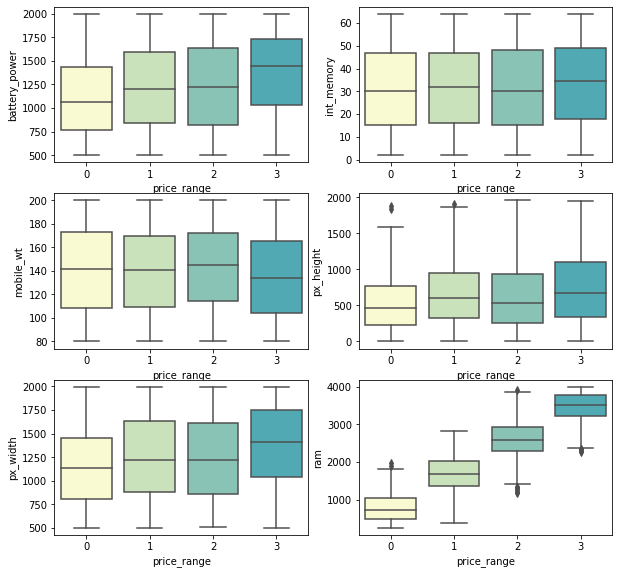

In [ ]:
# Check outlier in numeric_features
i = 1
plt.figure(figsize=(10,20))
for feature in numeric_features:
    plt.subplot(6,2,i)
    sns.set_palette("dark")
    sns.boxplot(x='price_range' , y=feature, data=df, palette=["#ffffcc", "#c7e9b4", "#7fcdbb", "#41b6c4"])
    i+=1

Terdapat outlier pada ram dan px_height

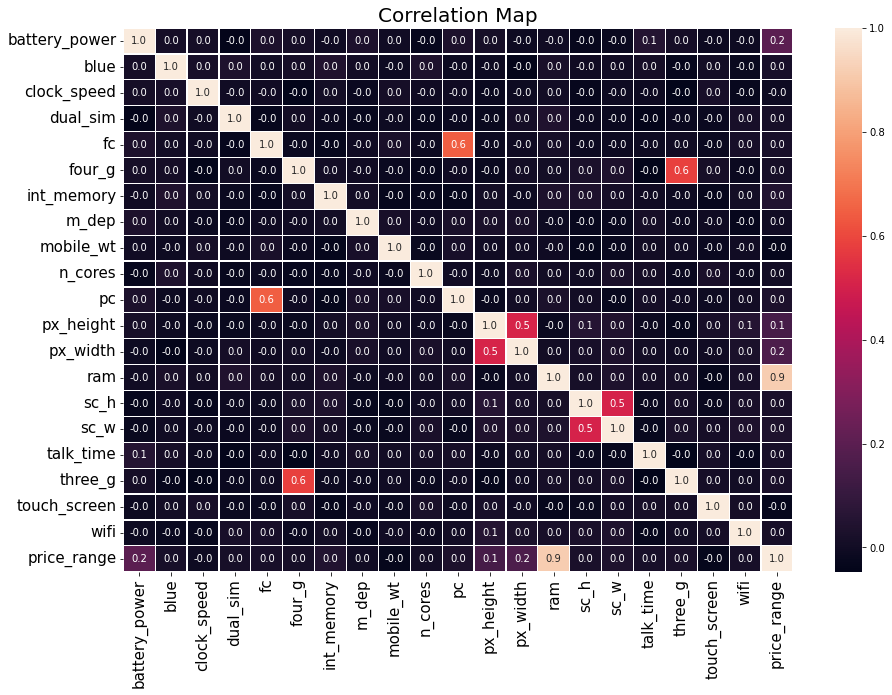

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), annot=True, linewidths=.2, fmt= '.1f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation Map", fontsize=20)
plt.show()

####Jika diliat dari heatmap, yang memiliki korelasi dengan price_range yaitu ram, px_width, px_height, dan battery_power

##Modelling in Machine Learning

###Do splitting test

In [ ]:
from sklearn.model_selection import train_test_split # for split the data into data train and test

In [ ]:
x = df.loc[:, df.columns != 'price_range']
y = df['price_range']

In [ ]:
#print x or y
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
x.shape

(2000, 20)

In [ ]:
y.value_counts().sort_values()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
# Declare variable for splitting x and y into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
#Print to make sure the train or test data in x or y
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0


In [ ]:
y_test.head()

674     0
1699    0
1282    1
1315    1
1210    2
Name: price_range, dtype: int64

###Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
# using logistic regression by default
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lr.score(X_test, y_test)

0.6283333333333333

###Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(X_test, y_test)

0.8433333333333334

###Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(X_test, y_test)

0.8716666666666667

##Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs = -1, verbose = 1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#Mencari tahu skor terbaik dari grid search
grid_search.best_score_

0.8592857142857143

In [ ]:
# Mencari tahu parameter yang terbaik
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

##Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rfc = rfc.predict(X_test)

In [ ]:
#accuracy_score
print('Akurasi untuk Logistic Regression: ', round(accuracy_score(y_test, y_lr), 2))
print('Akurasi untuk Decision Tree', round(accuracy_score(y_test, y_dtree), 2))
print('Akurasi untuk Random Forest', round(accuracy_score(y_test, y_rfc), 2))

Akurasi untuk Logistic Regression:  0.63
Akurasi untuk Decision Tree 0.84
Akurasi untuk Random Forest 0.87


In [ ]:
#Precision score variable
round_precision_score_lr = round(precision_score(y_test, y_lr, average='macro'), 2)
round_precision_score_dtree = round(precision_score(y_test, y_dtree, average='macro'), 2)
round_precision_score_rfc = round(precision_score(y_test, y_rfc, average='macro'), 2)

In [ ]:
#print precision score
print('Precision score untuk Logistic Regression: ', round_precision_score_lr)
print('Precision score untuk Decision Tree: ', round_precision_score_dtree)
print('Precision score untuk Random Forest: ', round_precision_score_rfc)

Precision score untuk Logistic Regression:  0.63
Precision score untuk Decision Tree:  0.85
Precision score untuk Random Forest:  0.87


In [ ]:
# Recall score variable
round_recall_score_lr = round(recall_score(y_test, y_lr, average='macro'), 2)
round_recall_score_dtree = round(recall_score(y_test, y_dtree, average='macro'), 2)
round_recall_score_rfc = round(recall_score(y_test, y_rfc, average='macro'), 2)

In [ ]:
#print recall_score
print('Recall score untuk Logistic Regression: ', round_recall_score_lr)
print('Recall score untuk Decision Tree: ', round_recall_score_dtree)
print('Recall score untuk Random Forest: ', round_recall_score_rfc)

Recall score untuk Logistic Regression:  0.64
Recall score untuk Decision Tree:  0.85
Recall score untuk Random Forest:  0.87


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       135
           1       0.53      0.58      0.55       149
           2       0.53      0.40      0.45       168
           3       0.67      0.78      0.72       148

    accuracy                           0.63       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.62      0.63      0.62       600

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       135
           1       0.75      0.84      0.79       149
           2       0.85      0.78      0.81       168
           3       0.89      0.92      0.91       148

    accuracy                           0.84       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.84      0.84       600

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       135
           1       0.